<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 전국 아파트 평균 매매가격

<img src='https://raw.githubusercontent.com/Jangrae/img/master/apart.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 apart 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/apart_price.csv
- 단축 경로: 'https://bit.ly/ApartFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 읽어옵니다.

In [3]:
# 데이터 읽어오기
x02path = 'https://bit.ly/ApartFile'
apart = pd.read_csv(x02path, encoding='CP949')

## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [4]:
# 상위 5개 행 확인
apart.head() #(단위 : 만 원)

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


In [5]:
# 하위 5개 행 확인
apart.tail()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400
186,제주,서귀포시,223087,222696,222196,221685,221457,221500,222043,222913,223370,224065,224913,231457


**2) 열 데이터 형식, 값 개수 확인**

- 어떤 열이 있고, 맻 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [6]:
# 열 정보 확인

apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역1      187 non-null    object
 1   지역2      187 non-null    object
 2   2020-08  187 non-null    int64 
 3   2020-09  187 non-null    int64 
 4   2020-10  187 non-null    int64 
 5   2020-11  187 non-null    int64 
 6   2020-12  187 non-null    int64 
 7   2021-01  187 non-null    int64 
 8   2021-02  187 non-null    int64 
 9   2021-03  187 non-null    int64 
 10  2021-04  187 non-null    int64 
 11  2021-05  187 non-null    int64 
 12  2021-06  187 non-null    int64 
 13  2021-07  187 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 20.6+ KB


**3) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [7]:
# 결측치 확인

apart.isnull().sum()

지역1        0
지역2        0
2020-08    0
2020-09    0
2020-10    0
2020-11    0
2020-12    0
2021-01    0
2021-02    0
2021-03    0
2021-04    0
2021-05    0
2021-06    0
2021-07    0
dtype: int64

## 3.데이터 전처리
전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 열 이름 변경**

- 지역1, 지역2 열 이름을 각각 '시도', '구군'으로 변경합니다.

In [8]:
# 열 이름 변경

region = {'지역1' : '시도' , '지역2' : '구군'}
apart.rename(columns = region, inplace = True)

# 확인

apart.head()

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


**2) 열 추가**

- 다음 공식을 사용해 '증가액', '증가율' 열을 추가합니다.

    - 증가액: 2021년 7월 가격 - 2020년 8월 가격
    - 증가율: (2021년 7월 가격 - 2020년 8월 가격) * 100 / 2020년 8월 가격

In [9]:
# 연간 증가액

apart['증가액'] = apart['2021-07'] - apart['2020-08']


# 연간 증가율

apart['증가율'] = (apart['2021-07'] - apart['2020-08']) * 100 / apart['2020-08']
# 확인

apart

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,증가액,증가율
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750,21208,2.059945
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486,27229,3.394050
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073,45719,3.267150
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157,36441,4.001357
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805,42768,4.188683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125,2670,2.111423
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079,5805,3.738552
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215,31641,18.334743
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400,40529,13.337568


**3) 불필요한 열 제거**

- 시도, 구군, 증가액, 증가율 열만 추출하여 apart2 데이터프레임을 선언합니다.
- 이후 모든 작업은 apart2 데이터프레임을 대상으로 합니다.

In [10]:
# 분석 대상 열 지정

col = ['시도','구군','증가액','증가율']
apart2 = apart.loc[ : , col]

# 확인
apart2

,시도,구군,증가액,증가율
0,서울,종로구,21208,2.059945
1,서울,중구,27229,3.394050
2,서울,용산구,45719,3.267150
3,서울,성동구,36441,4.001357
4,서울,광진구,42768,4.188683
...,...,...,...,...
182,경남,밀양시,2670,2.111423
183,경남,거제시,5805,3.738552
184,경남,양산시,31641,18.334743
185,제주,제주시,40529,13.337568


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

### 4.1.전국 분석

**1) 가격 변동 현황**

- 구군의 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

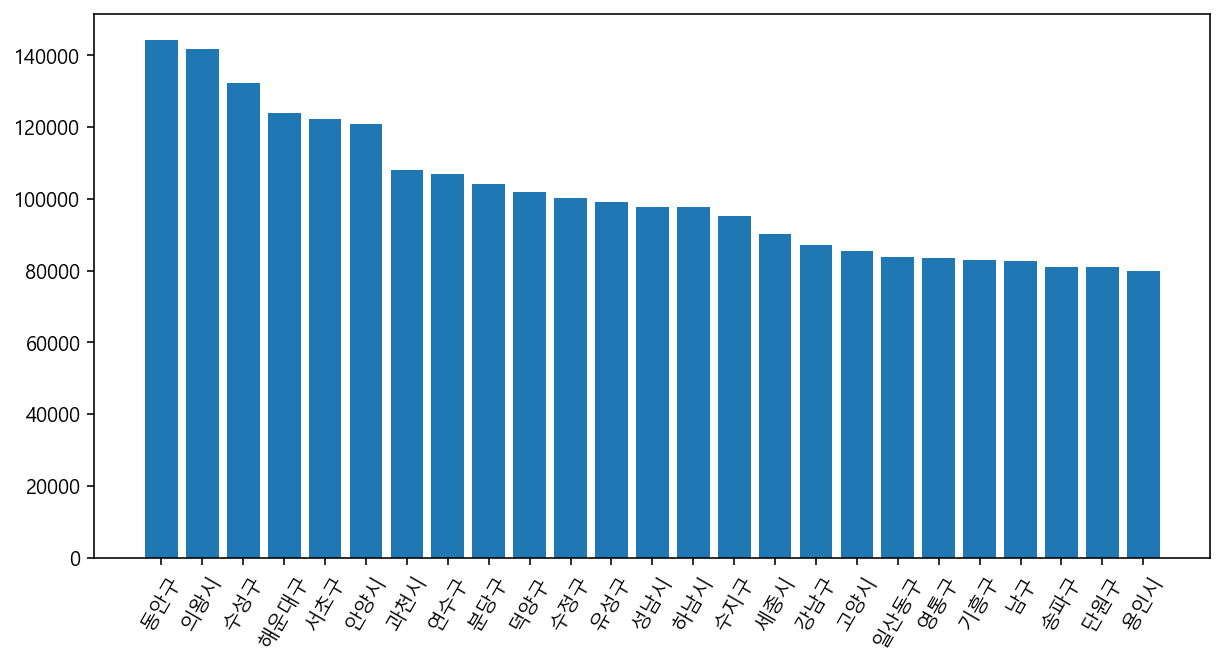

In [17]:
gugun = apart2.sort_values(by = '증가액',ascending = False).head(25)

plt.figure(figsize = [10, 5])
plt.bar(gugun['구군'],gugun['증가액'])
plt.xticks(rotation=60)
plt.show()


**2) 가격 변동 TOP 25**

- 증가액 기준으로 상위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [13]:
# 가격 변동 TOP 25

tmp = apart.sort_values(by = '증가액', ascending = False).head(25)
tmp.reset_index(drop=True,inplace=True)

# 확인

tmp

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,증가액,증가율
0,경기,동안구,576621,580114,584455,589689,595333,601614,609636,621727,635394,654000,678811,720886,144265,25.019033
1,경기,의왕시,495438,499913,506688,511213,514225,519100,528213,557315,579038,598775,616700,637225,141787,28.618515
2,대구,수성구,515851,524139,535841,548632,568595,587878,601135,615932,627311,633635,641182,648196,132345,25.655664
3,부산,해운대구,402664,416750,430352,441008,462680,476023,483148,489547,494570,499422,509109,526641,123977,30.789194
4,서울,서초구,1751014,1757795,1759164,1759747,1761322,1771322,1783411,1797521,1807781,1818192,1834199,1873390,122376,6.988865
5,경기,안양시,541945,545383,549345,553694,558437,563770,571466,582922,595620,611936,630622,662823,120878,22.304477
6,경기,과천시,1260208,1270396,1276354,1277958,1278688,1292229,1310583,1330208,1340167,1344000,1349292,1368271,108063,8.575013
7,인천,연수구,458805,459403,460747,461636,464825,471851,485916,503344,517922,534857,548870,565838,107033,23.328647
8,경기,분당구,926750,938453,946007,951331,964284,981250,1000182,1014649,1019088,1022264,1026304,1030865,104115,11.234421
9,경기,덕양구,385507,390507,395507,399772,409985,424375,443838,463279,472735,478537,481544,487441,101934,26.441543


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

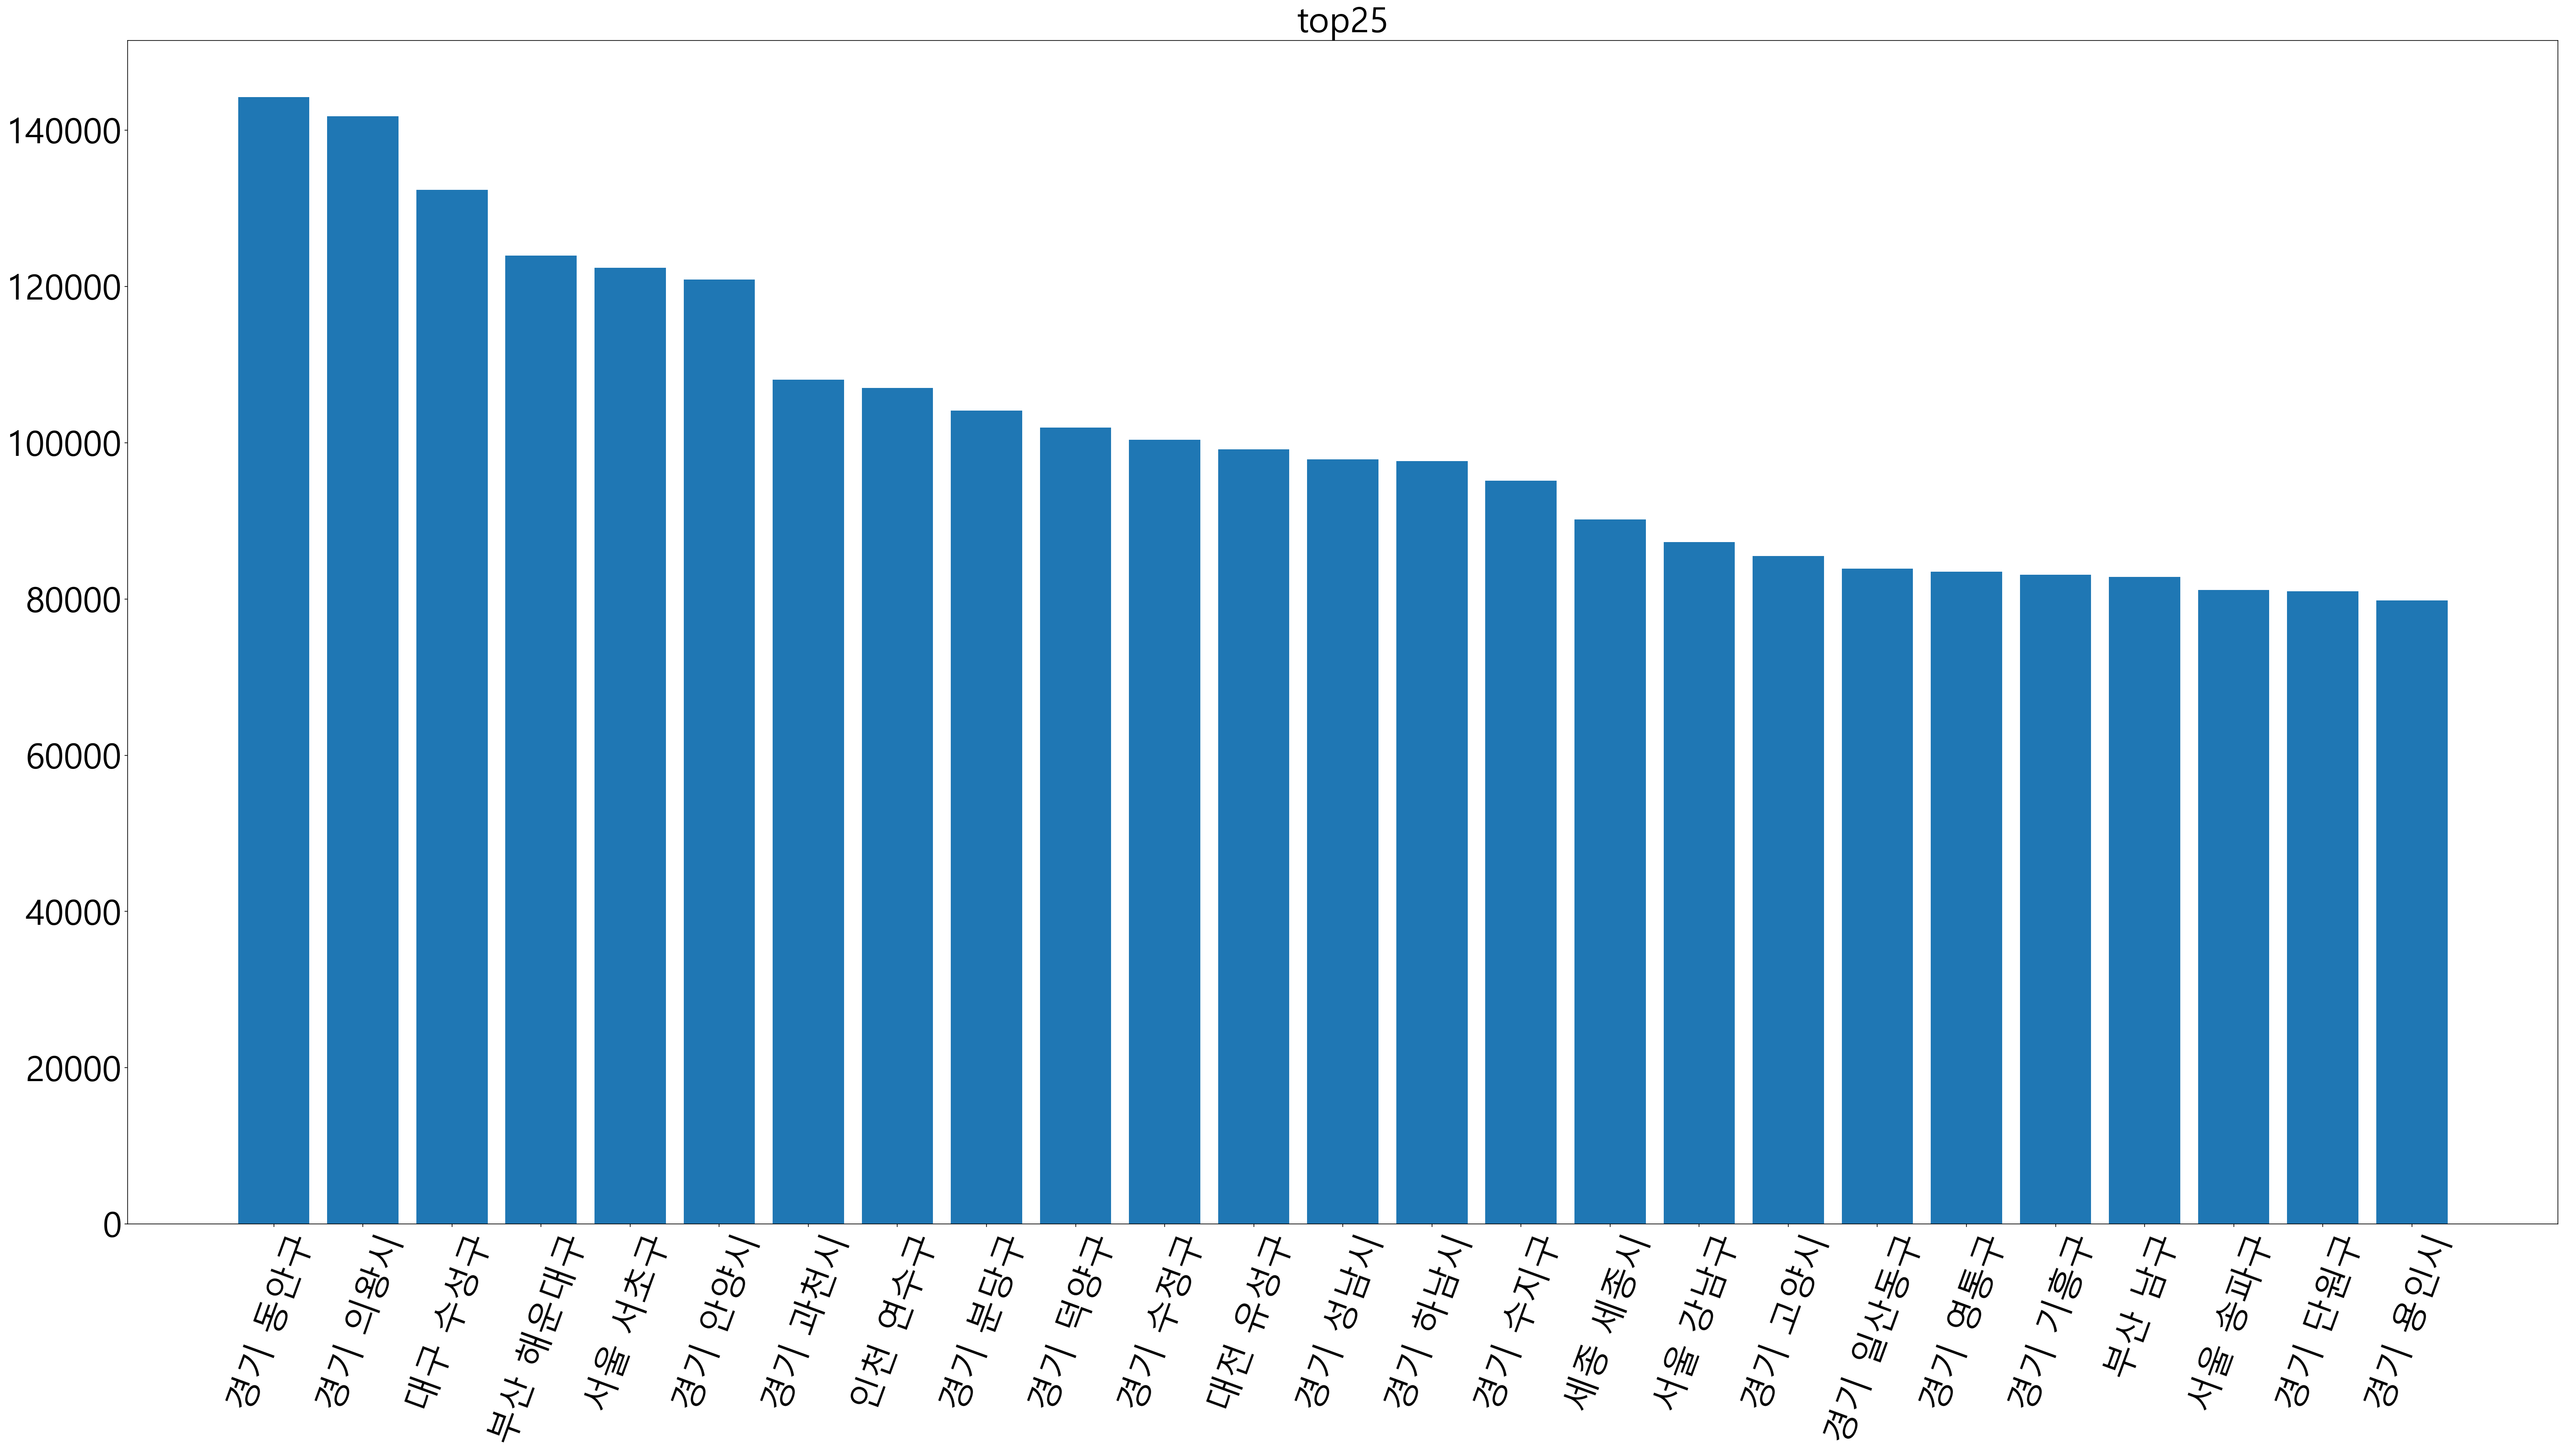

In [14]:
# 차트 그리기

plt.figure(figsize=(50, 25))
plt.bar(tmp['시도']+' '+tmp['구군'],tmp['증가액'])
plt.xticks(rotation=70)
plt.xticks(fontsize =40)
plt.yticks(fontsize =40)
plt.title('top25',fontsize=40)
plt.show()



**3) 가격 변동 BOTTOM 25**

- 증가액 기준으로 하위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [18]:
# 가격 변동 BOTTOM 25

tup = apart.sort_values(by = '증가액', ascending = True).head(25)
tup.reset_index(drop=True,inplace=True)

# 확인
tup

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,증가액,증가율
0,충남,당진시,164868,164951,164090,163701,163264,163007,162403,161799,161382,160646,160021,159604,-5264,-3.192857
1,경남,사천시,126620,126213,125639,125269,124815,124296,123963,123796,123704,123676,123398,123093,-3527,-2.785500
2,부산,중구,147333,146708,146042,145708,145500,145708,145292,145042,143750,144000,143542,144688,-2645,-1.795253
3,전남,무안군,195113,193738,192375,191950,191088,190163,190400,190525,190625,190700,191000,192525,-2588,-1.326411
4,전남,목포시,147535,147076,146660,146306,146069,145799,145729,144972,144410,144465,144410,145139,-2396,-1.624021
5,전남,나주시,166240,165479,164583,163406,162802,162385,161990,161960,161885,161885,163344,165052,-1188,-0.714629
6,경북,문경시,141250,141233,141167,141033,141033,141233,141233,141317,140567,140233,140500,140700,-550,-0.389381
7,경북,영천시,101226,101131,100976,100893,100786,100821,100750,100817,100812,100979,101050,101133,-93,-0.091874
8,강원,태백시,78375,78375,78188,78208,78250,78146,78125,78188,78313,78125,78208,78333,-42,-0.053589
9,전북,남원시,140735,140809,140441,140118,140162,140544,140691,140794,140838,140838,140941,141221,486,0.345330


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

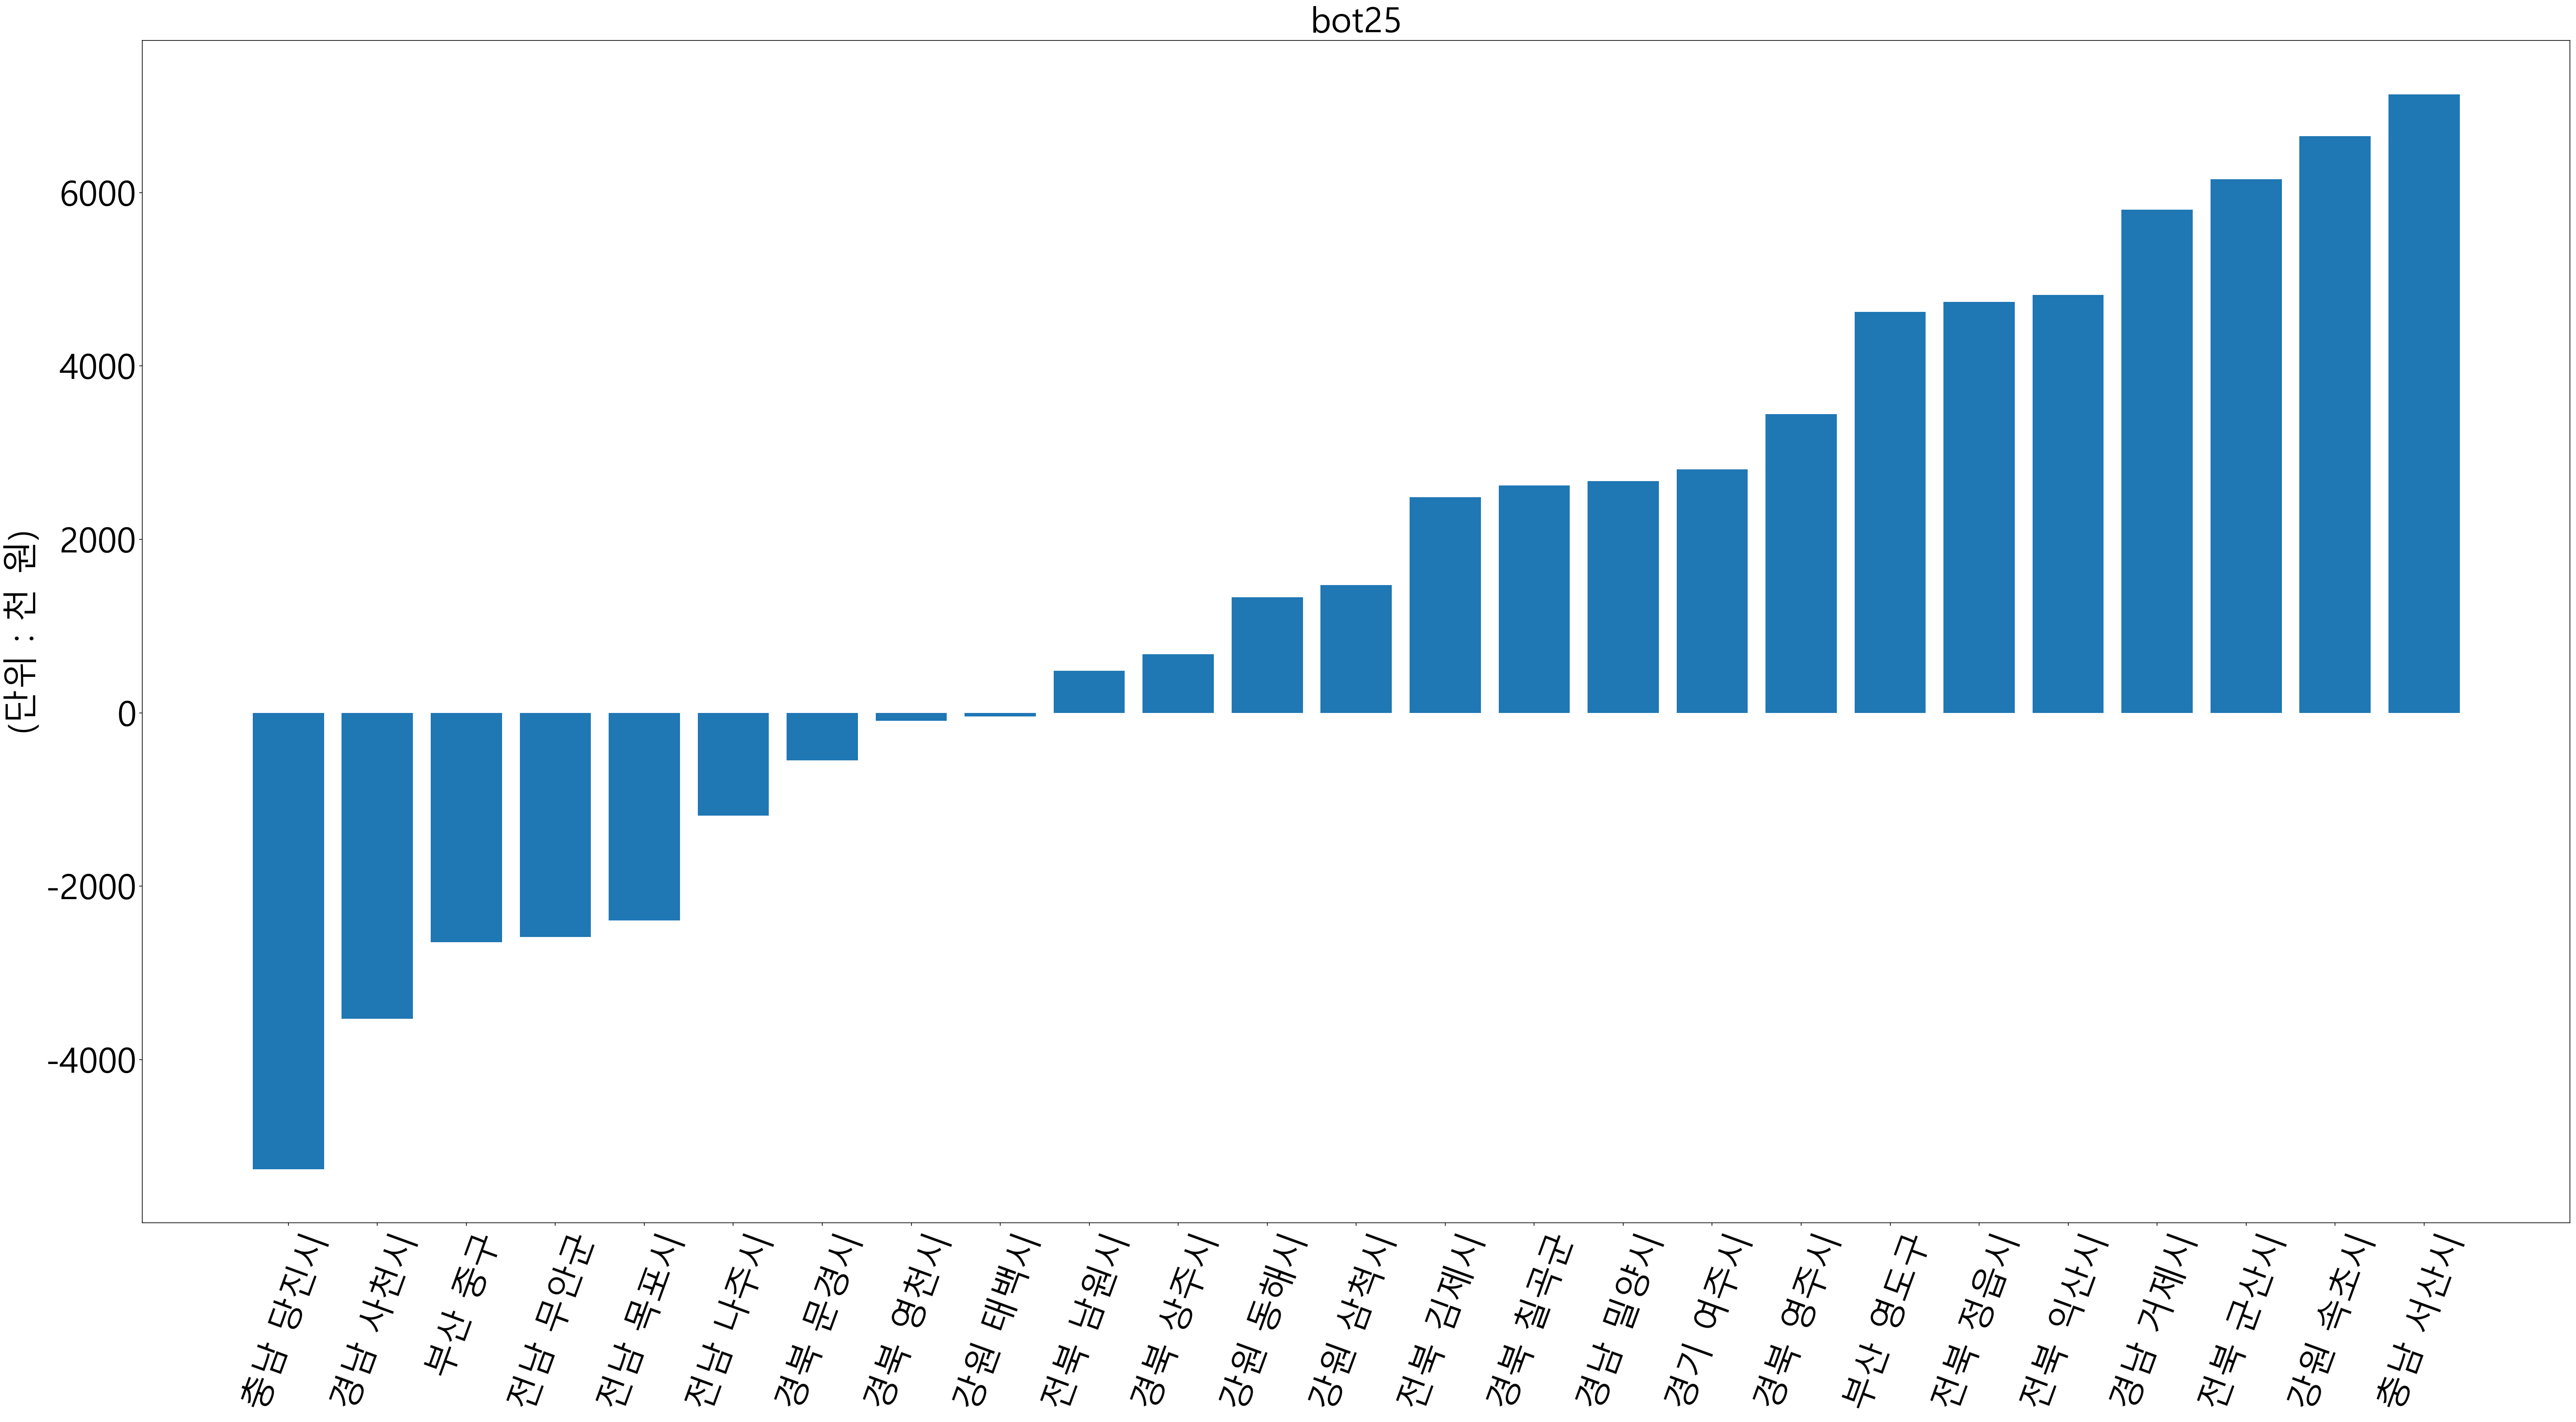

In [19]:
# 차트 그리기

plt.figure(figsize=(50, 25))
plt.bar(tup['시도']+' '+tup['구군'],tup['증가액'])
plt.xticks(rotation=70)
plt.xticks(fontsize =40)
plt.ylabel('(단위 : 천 원)', fontsize = 40)
plt.yticks(fontsize =40)
plt.title('bot25',fontsize=40)
plt.show()




### 4.2.ㅇㅇ 지역 분석

**1) ㅇㅇ 지역 데이터 추출**

- apart2 데이터프레임에서 ㅇㅇ지역 데이터만 추출해 새로운 데이터프레임을 선언합니다.

In [21]:
# 데이터프레임 만들기

daejeon = apart2[apart2['시도'] == '대전']


# 확인
daejeon

,시도,구군,증가액,증가율
107,대전,동구,29261,11.170623
108,대전,중구,30184,12.572947
109,대전,서구,52915,16.268174
110,대전,유성구,99153,23.851540
111,대전,대덕구,28917,14.991835


**2) ㅇㅇ 지역 가격 변동 현황**

- ㅇㅇ 지역 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

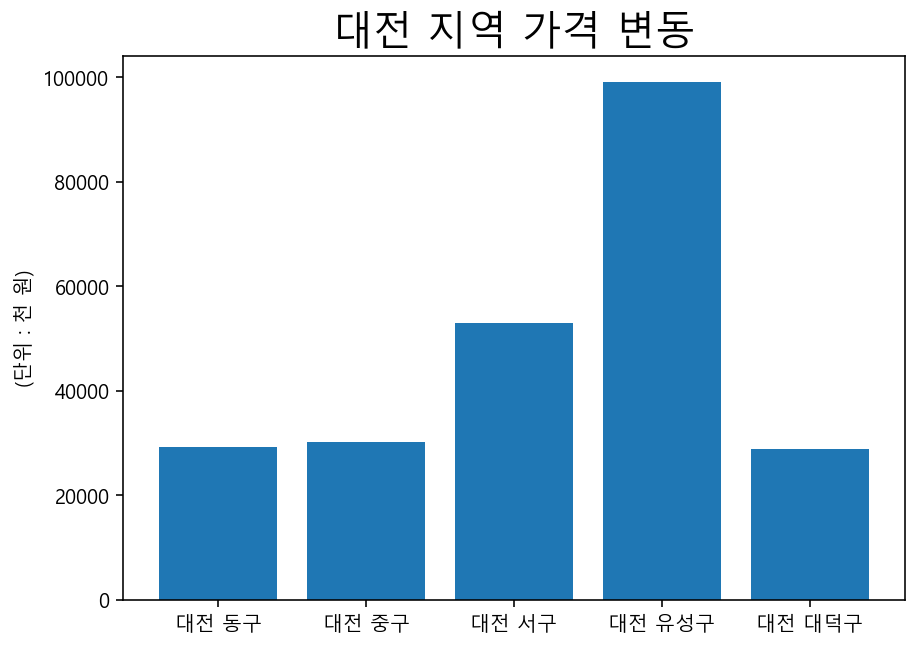

In [22]:
# ㅇㅇ 지역 가격 변동

plt.figure(figsize=(7,5))
plt.bar(daejeon['시도']+' '+daejeon['구군'],daejeon['증가액'])
plt.ylabel('(단위 : 천 원)')
plt.title('대전 지역 가격 변동',fontsize = 20)
plt.show()



**3) ㅇㅇ 지역 가격 변동 순위**

- 아파트 매매가 증가액을 기준으로 내림차순 정렬해 tmp 데이터프레임을 선언합니다.
- tmp 데이터프레임을 대상으로 다시 시각화해 확인합니다.

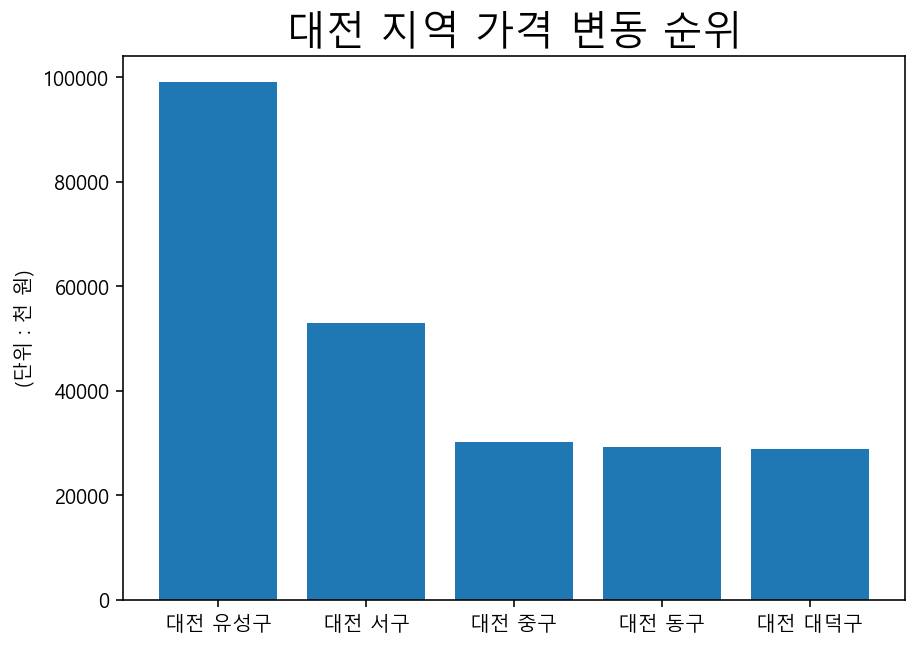

In [23]:
# ㅇㅇ 지역 가격 변동 순위

tmp = daejeon.sort_values('증가액', ascending = False).head(5)
daejeon.index.name = None

# 시각화

plt.figure(figsize=(7, 5))
plt.bar(tmp['시도']+' '+tmp['구군'],tmp['증가액'])
plt.ylabel('(단위 : 천 원)')
plt.title('대전 지역 가격 변동 순위',fontsize=20)
plt.show()

추가) 전국 가격 변화율

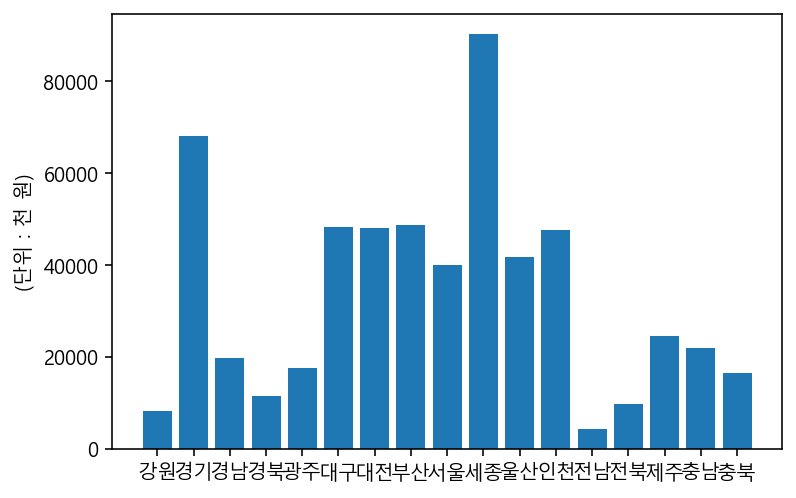

In [24]:


tmp2 = apart2.groupby(['시도'], as_index = False,)['증가액'].mean()
tmp2.sort_values('증가액', ascending = True).head(25)


plt.bar(tmp2['시도'],tmp2['증가액'])
plt.ylabel('(단위 : 천 원)')
plt.show()


추가) 시도 별 증가액의 최댓값과 최솟값 차이

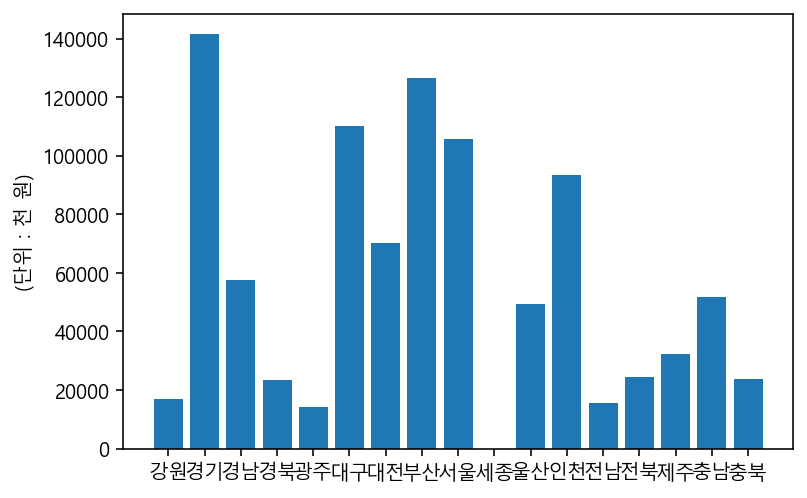

In [88]:
tmpmax = apart2.groupby(['시도'], as_index = False,)['증가액'].max()
tmpmin = apart2.groupby(['시도'], as_index = False,)['증가액'].min()

plt.bar(tmp2['시도'],tmpmax['증가액']-tmpmin['증가액'])
plt.ylabel('(단위 : 천 원)')
plt.show()

추가) 시도별 증가액, 증가율

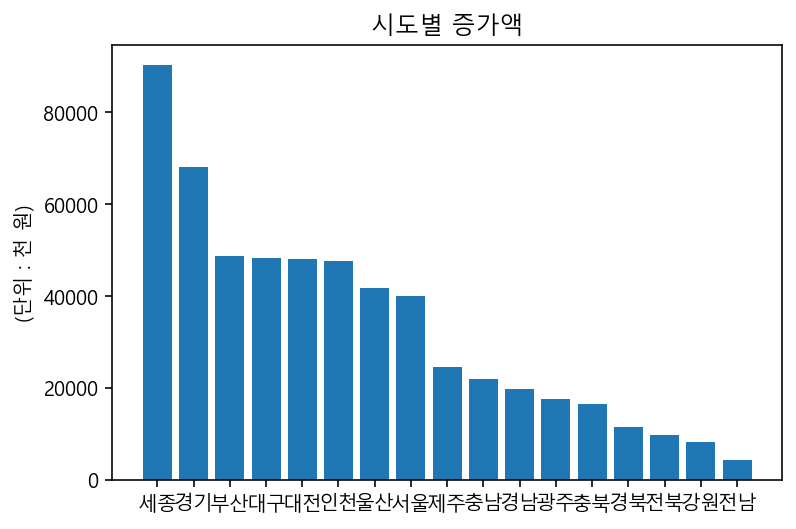

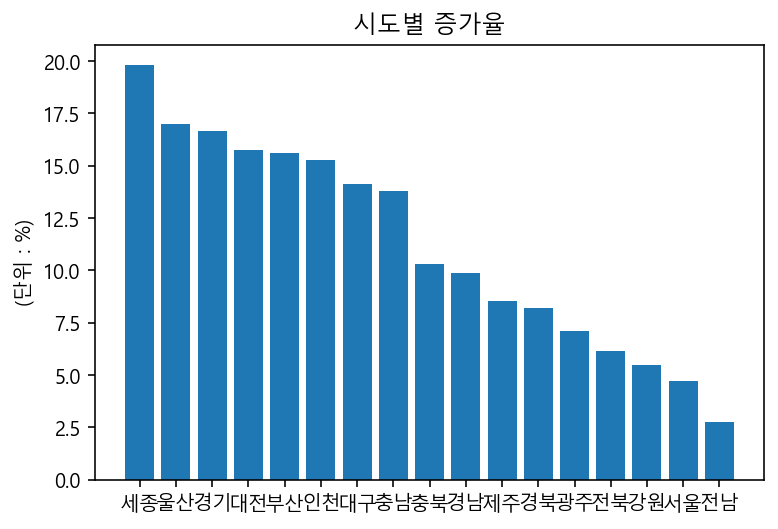

In [25]:
#시도별 증가액/증가율
tmp2 = apart2.groupby('시도',as_index=False)['증가액'].mean()
tmp2.sort_values(by='증가액',ascending=False,inplace=True)
plt.bar(tmp2['시도'],tmp2['증가액'])
plt.ylabel('(단위 : 천 원)')
plt.title('시도별 증가액')
plt.show()

tmp3 = apart2.groupby('시도',as_index=False)['증가율'].mean()
tmp3.sort_values(by='증가율',ascending=False,inplace=True)
plt.ylabel('(단위 : %)')
plt.bar(tmp3['시도'],tmp3['증가율'])
plt.title('시도별 증가율')
plt.show()

## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 상위는 수도권, 하위는 충남 당진시  
- 매매가격 증가액 top25에서 경기도 지역이 많다
- 2/4 주택공급 대책 이후로 가격 변화는 크지 않다
- 시도별 증가율을 조사한 결과 세종, 경기가 가장 높은 비율로 증가하였고 의외로 서울은 뒤에서 두번째를 기록하였다. 이미 가격이 높아 증가율은 높지 않은 것으로 추정된다.

**2) 기타**

- 세종시의 아파트 매매가 상승률이 엄청나다.
- 서울 아파트 가격도 많이 상승했는데 원래 비싸다 보니 비율 상으로는 높지 않다.
- 
- 
- 
